# Importing libraries

In [1]:
import pandas as pd
import numpy as nm
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact
import seaborn as sns


# Reading Excel File


In [2]:
assign1 = pd.read_excel("InformationisBeautiful_DataBreaches.xlsx")

# Removing the unused columns

In [3]:
#Commands to remove all columns that are not mentioned in the document shared
del assign1['Unnamed: 7']
del assign1['Unnamed: 10']
del assign1['Unnamed: 11']
del assign1['Unnamed: 12']
del assign1['Unnamed: 13']
del assign1['alternative name']
del assign1['story']
del assign1['1st source link']
del assign1['2nd source link']
del assign1['3rd source']
del assign1['source name']


In [4]:
#excel sheet after removing all the unneccessary columns
assign1

,Entity,YEAR,records lost,ORGANISATION,METHOD OF LEAK,NO OF RECORDS STOLEN,DATA SENSITIVITY
0,NaN,"years are encoded (0=2004, 8 = 2012, 9 = 2013,...","(use 3m, 4m, 5m or 10m to approximate unknown ...",NaN,NaN,"(use 3m, 4m, 5m or 10m to approximate unknown ...",1. Just email address/Online information 20 SS...
1,AOL,0,92000000,web,"inside job, hacked",92000000,1
2,Automatic Data Processing,1,125000,financial,poor security,130000,20
3,Ameritrade Inc.,1,200000,financial,lost / stolen media,200000,20
4,Citigroup,1,3900000,financial,lost / stolen media,3900000,300
5,Cardsystems Solutions Inc.,1,40000000,financial,hacked,40000000,300
6,Hewlett Packard,2,200000,"tech, retail",lost / stolen media,200000,20
7,Countrywide Financial Corp,2,2600000,financial,inside job,2600000,300
8,KDDI,2,4000000,telecoms,hacked,4000000,1
9,"T-Mobile, Deutsche Telecom",2,17000000,telecoms,lost / stolen media,17000000,1


In [5]:
#make a copy of the excel file 
assign2 = assign1

In [6]:
#format the column title
assign2 = assign2.rename(columns={'YEAR':'Year','records lost':'Records Lost','ORGANISATION':'Organization','METHOD OF LEAK':'Method of Leak','DATA SENSITIVITY':'Data Sensitivity'})

In [7]:
#decode Year column as given in the instructions
assign2.loc[assign2.Year==0,'Year']=2004
assign2.loc[assign2.Year==1,'Year']=2005
assign2.loc[assign2.Year==2,'Year']=2006
assign2.loc[assign2.Year==3,'Year']=2007
assign2.loc[assign2.Year==4,'Year']=2008
assign2.loc[assign2.Year==5,'Year']=2009
assign2.loc[assign2.Year==6,'Year']=2010
assign2.loc[assign2.Year==7,'Year']=2011
assign2.loc[assign2.Year==8,'Year']=2012
assign2.loc[assign2.Year==9,'Year']=2013
assign2.loc[assign2.Year==10,'Year']=2014
assign2.loc[assign2.Year==11,'Year']=2015
assign2.loc[assign2.Year==12,'Year']=2016
assign2.loc[assign2.Year==13,'Year']=2017
assign2.loc[assign2.Year==14,'Year']=2017

In [8]:
#Remove 0th row
assign2 = assign2.iloc[1:]

In [9]:
assign2['Data Sensitivity'] = pd.to_numeric(assign2['Data Sensitivity'])

In [10]:
#decode data sensitivity column as per the instruction in excel sheet.
assign2.loc[(assign2['Data Sensitivity']==1),'Data Sensitivity']='Just Email Addresses/Online Information'
assign2.loc[(assign2['Data Sensitivity']==20),'Data Sensitivity']='SSN/Personal Details'
assign2.loc[(assign2['Data Sensitivity']==300),'Data Sensitivity']='Credit card Information'
assign2.loc[(assign2['Data Sensitivity']==4000),'Data Sensitivity']='Email Passwords/Health Records'
assign2.loc[(assign2['Data Sensitivity']==50000),'Data Sensitivity']='Full Bank Account Details'

In [11]:
#Find out if there are any missing values
assign2.isnull().values.any()

True

In [12]:
#Find out the column that has null value
assign2.isnull().sum()

Entity                  0
Year                    0
Records Lost            2
Organization            0
Method of Leak          0
NO OF RECORDS STOLEN    0
Data Sensitivity        0
dtype: int64

In [13]:
#Identify the rows that have null value for the column 'Records Lost'
assign2[assign2.isnull().any(axis=1)]

,Entity,Year,Records Lost,Organization,Method of Leak,NO OF RECORDS STOLEN,Data Sensitivity
164,OVH,2013,NaN,web,hacked,500000,SSN/Personal Details
165,UbiSoft,2013,NaN,gaming,hacked,58000000,SSN/Personal Details


In [14]:
assign_try = assign2
assign_try

,Entity,Year,Records Lost,Organization,Method of Leak,NO OF RECORDS STOLEN,Data Sensitivity
1,AOL,2004,92000000,web,"inside job, hacked",92000000,Just Email Addresses/Online Information
2,Automatic Data Processing,2005,125000,financial,poor security,130000,SSN/Personal Details
3,Ameritrade Inc.,2005,200000,financial,lost / stolen media,200000,SSN/Personal Details
4,Citigroup,2005,3900000,financial,lost / stolen media,3900000,Credit card Information
5,Cardsystems Solutions Inc.,2005,40000000,financial,hacked,40000000,Credit card Information
6,Hewlett Packard,2006,200000,"tech, retail",lost / stolen media,200000,SSN/Personal Details
7,Countrywide Financial Corp,2006,2600000,financial,inside job,2600000,Credit card Information
8,KDDI,2006,4000000,telecoms,hacked,4000000,Just Email Addresses/Online Information
9,"T-Mobile, Deutsche Telecom",2006,17000000,telecoms,lost / stolen media,17000000,Just Email Addresses/Online Information
10,AOL,2006,20000000,web,accidentally published,20000000,Just Email Addresses/Online Information


In [15]:
assign_try['Records Lost'].fillna(assign_try['NO OF RECORDS STOLEN'],inplace = True)


In [16]:
del assign_try['NO OF RECORDS STOLEN']


In [17]:
assign_try

,Entity,Year,Records Lost,Organization,Method of Leak,Data Sensitivity
1,AOL,2004,92000000,web,"inside job, hacked",Just Email Addresses/Online Information
2,Automatic Data Processing,2005,125000,financial,poor security,SSN/Personal Details
3,Ameritrade Inc.,2005,200000,financial,lost / stolen media,SSN/Personal Details
4,Citigroup,2005,3900000,financial,lost / stolen media,Credit card Information
5,Cardsystems Solutions Inc.,2005,40000000,financial,hacked,Credit card Information
6,Hewlett Packard,2006,200000,"tech, retail",lost / stolen media,SSN/Personal Details
7,Countrywide Financial Corp,2006,2600000,financial,inside job,Credit card Information
8,KDDI,2006,4000000,telecoms,hacked,Just Email Addresses/Online Information
9,"T-Mobile, Deutsche Telecom",2006,17000000,telecoms,lost / stolen media,Just Email Addresses/Online Information
10,AOL,2006,20000000,web,accidentally published,Just Email Addresses/Online Information


In [18]:
#Find out the column that has null value
assign_try.isnull().sum()

Entity              0
Year                0
Records Lost        0
Organization        0
Method of Leak      0
Data Sensitivity    0
dtype: int64

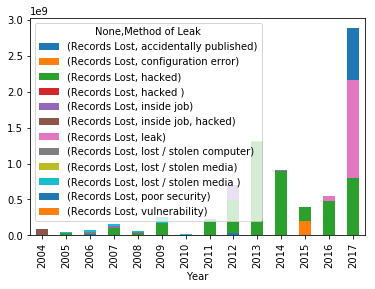

In [19]:
 #Analyse the data
assign_try['Records Lost'] = pd.to_numeric(assign_try['Records Lost'])
assign_try.describe()
assign_try['Records Lost'].describe()

plotdata = assign_try[['Year','Records Lost','Entity','Method of Leak']]
plotdata_group = plotdata.groupby(['Year','Method of Leak']).sum()

plotdata_group.unstack().head
plotdata_total = plotdata_group.sum()
myplot = plotdata_group.unstack().plot(kind ='bar',stacked = 'True')

# Write to excel file 

In [20]:
assign_try.to_excel("Assignment2_databreach_v1.xlsx")

In [21]:
assign_try.to_csv("Assignment_2v4.csv", index=False)